In [92]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [93]:
import os 

In [94]:
os.getcwd()

'D:\\datasets'

In [95]:
os.chdir('D:\\datasets')

In [96]:
os.getcwd()

'D:\\datasets'

In [97]:
df=pd.read_csv('Churn Modeling.csv')

In [98]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
print("shape of data =",df.shape)

shape of data = (10000, 14)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1 )

In [102]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4712,474,France,Male,54,3,0.00,1,1,0,108409.17,1
4720,619,Germany,Female,33,3,100488.92,2,0,1,36446.74,0
5779,684,Spain,Male,40,2,70291.02,1,1,1,115468.84,1
2840,528,Spain,Male,40,4,0.00,2,1,0,25399.70,0
4123,652,Spain,Female,38,1,103895.31,1,0,1,159649.44,0
759,664,France,Male,58,5,98668.18,1,1,1,60887.58,0
9707,642,France,Female,41,7,115171.71,1,1,1,37674.47,0
6083,519,Germany,Male,38,1,114141.64,1,1,1,60988.21,1
7226,777,Germany,Female,46,0,107362.80,1,1,0,487.30,0
4737,791,France,Male,36,6,111168.97,1,1,1,189969.91,0


In [103]:
for col in df:
    print(col,df[col].unique())

CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [104]:
for col in df:
    print(col,df[col].nunique())

CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [105]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [106]:
df_new=df[df.Balance!=0.00]

In [107]:
df_new.shape

(6383, 11)

In [108]:
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [109]:
import warnings 
warnings.filterwarnings('ignore')


In [117]:
df_new.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

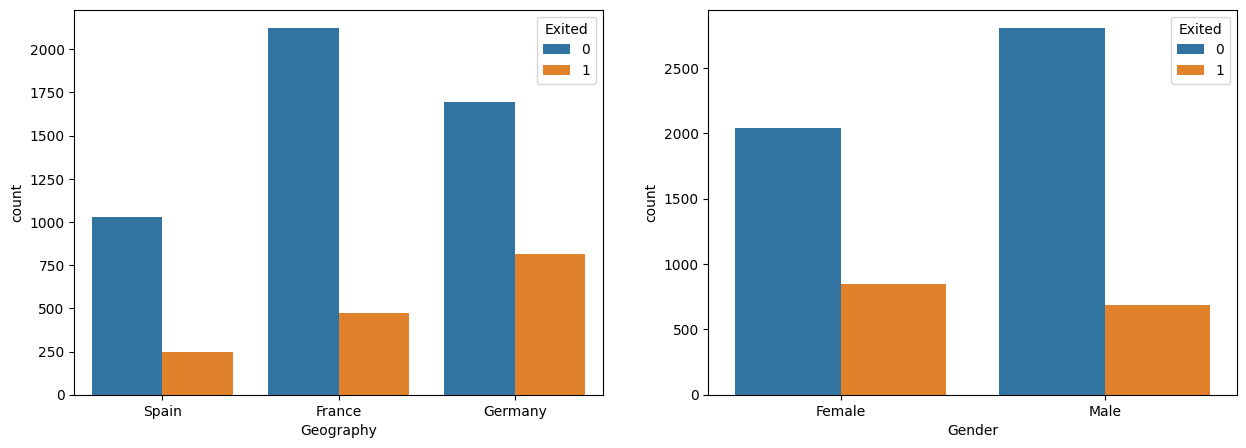

In [110]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Geography',data=df_new,hue='Exited',ax=ax[0])
sns.countplot(x='Gender',data=df_new,hue='Exited',ax=ax[1])



In [112]:
df_new


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [113]:
for column in df_new:
       if (df_new[column]=="").any():
           print(column)
       else:
           print("no columns have empty string")

no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string
no columns have empty string


In [114]:
data_corr=df_new[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Exited']].corr()
print(data_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.009476  0.002884 -0.004744       0.008894   
Age                -0.009476  1.000000  0.009221 -0.012822       0.007565   
Tenure              0.002884  0.009221  1.000000  0.005827       0.006457   
Balance            -0.004744 -0.012822  0.005827  1.000000      -0.001027   
NumOfProducts       0.008894  0.007565  0.006457 -0.001027       1.000000   
EstimatedSalary     0.000570 -0.008592  0.012609 -0.001856       0.025769   
Exited             -0.030809  0.301554 -0.001221  0.017208       0.077910   

                 EstimatedSalary    Exited  
CreditScore             0.000570 -0.030809  
Age                    -0.008592  0.301554  
Tenure                  0.012609 -0.001221  
Balance                -0.001856  0.017208  
NumOfProducts           0.025769  0.077910  
EstimatedSalary         1.000000  0.006335  
Exited                  0.006335  1.000000  


<Axes: >

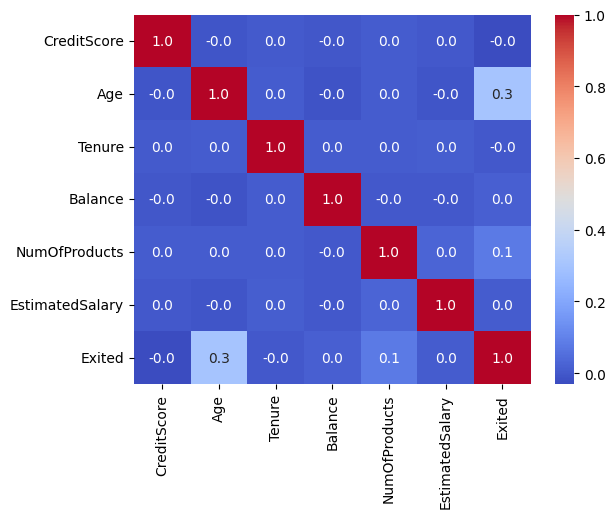

In [115]:
sns.heatmap(data_corr,annot=True,fmt='.1f',cmap='coolwarm')

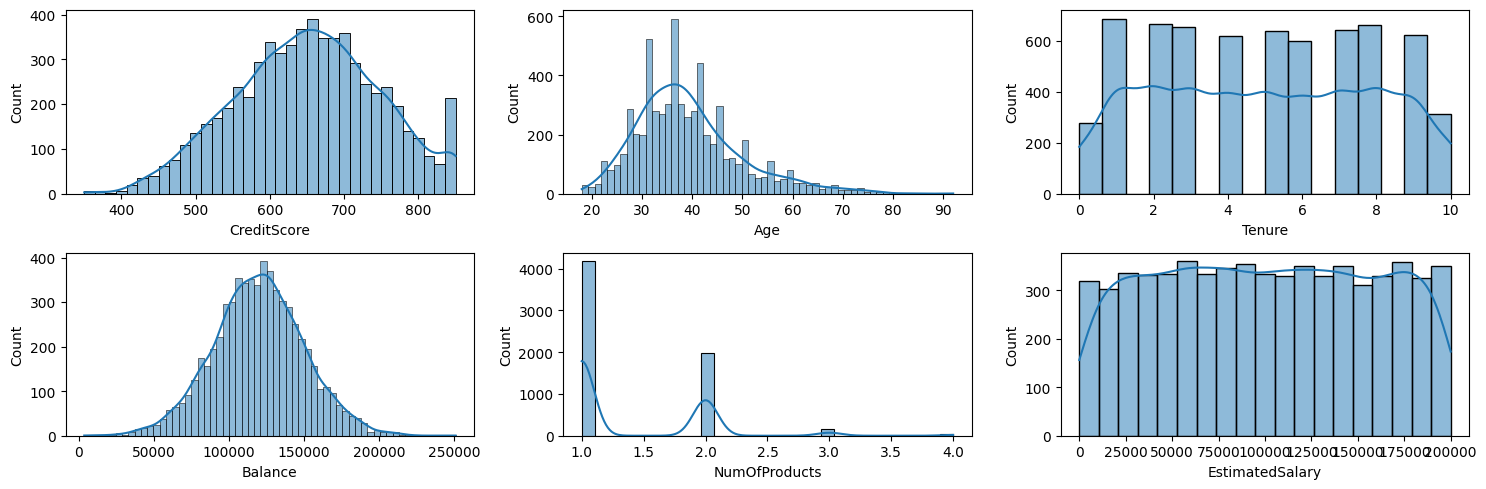

In [147]:
c1=['CreditScore','Age','Tenure']
c2=['Balance','NumOfProducts','EstimatedSalary']
fig,ax=plt.subplots(2,3,figsize=(15,5))
for i,j in enumerate(c1):
    sns.histplot(x =df_new[j],ax=ax[0][i],kde=True)
for i,j in enumerate(c2):
    sns.histplot(x =df_new[j],ax=ax[1][i],kde=True)
plt.tight_layout()

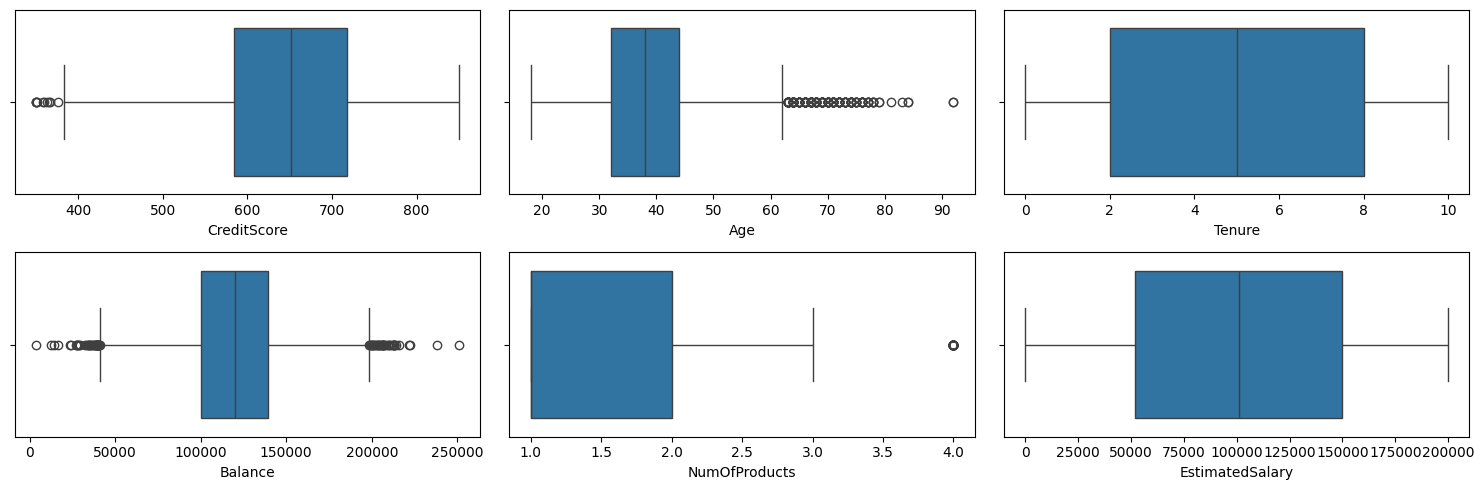

In [149]:
c1=['CreditScore','Age','Tenure']
c2=['Balance','NumOfProducts','EstimatedSalary']
fig,ax=plt.subplots(2,3,figsize=(15,5))
for i,j in enumerate(c1):
    sns.boxplot(x=df_new[j],ax=ax[0][i],)
for i,j in enumerate(c2):
    sns.boxplot(x=df_new[j],ax=ax[1][i])
plt.tight_layout()

**label Encoding**

In [151]:
df_new['Gender'].replace({'Female':1,'Male':0},inplace=True)
df_new['Geography'].replace({'Spain':2,'Germany':1,'France':0},inplace=True)

In [152]:
df_new.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1144,765,1,0,43,4,148962.76,1,0,1,173878.87,1
5567,676,1,0,28,1,69459.05,2,1,1,128461.29,0
1092,715,0,0,41,4,94267.90,1,0,1,152821.12,1
1555,658,0,1,40,7,140596.95,1,0,1,135459.02,1
4841,587,1,1,44,5,125584.17,2,1,1,41852.24,1
8135,710,1,1,24,7,103099.17,2,1,0,173276.62,0
2722,544,0,1,32,9,110728.39,1,1,1,14559.62,0
8745,663,2,1,28,8,61274.70,2,1,0,136054.45,0
6968,510,1,1,50,7,123936.54,1,1,1,23768.01,0
9314,613,1,1,51,7,147262.11,1,1,1,53630.90,1


**Before normalization or removing outliers** 

In [153]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 


In [155]:
x=df_new.drop('Exited',axis=1)
y=df_new['Exited']

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [158]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (5106, 10)
shape of x_test (1277, 10)
shape of y_train (5106,)
shape of y_test (1277,)


In [159]:
LR=LogisticRegression()

In [161]:
LR.fit(x_train,y_train)

LogisticRegression()

In [163]:
y_pred1=LR.predict(x_test)

In [164]:
from sklearn.metrics import accuracy_score

In [166]:
LR.score(x_train,y_train)

0.7688993341167254

In [167]:
print("accuracy",accuracy_score(y_test,y_pred1))

accuracy 0.8144087705559906


**Using ANN :**

In [168]:
model=keras.Sequential([keras.layers.Dense(6,input_shape=(10,),activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid')])


In [170]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [172]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
160/160 [==============================] - 0s 1ms/step - loss: 1941.8306 - accuracy: 0.6369
Epoch 2/50
160/160 [==============================] - 0s 984us/step - loss: 1133.4562 - accuracy: 0.6191
Epoch 3/50
160/160 [==============================] - 0s 983us/step - loss: 799.7986 - accuracy: 0.6116
Epoch 4/50
160/160 [==============================] - 0s 1ms/step - loss: 620.3216 - accuracy: 0.6107
Epoch 5/50
160/160 [==============================] - 0s 1ms/step - loss: 488.4929 - accuracy: 0.6103
Epoch 6/50
160/160 [==============================] - 0s 983us/step - loss: 335.6233 - accuracy: 0.6132
Epoch 7/50
160/160 [==============================] - 0s 1ms/step - loss: 116.9930 - accuracy: 0.6467
Epoch 8/50
160/160 [==============================] - 0s 1ms/step - loss: 62.1382 - accuracy: 0.6467
Epoch 9/50
160/160 [==============================] - 0s 1ms/step - loss: 32.7424 - accuracy: 0.6624
Epoch 10/50
160/160 [==============================] - 0s 1ms/step - loss: 2

In [174]:
y_pred2=model.predict(x_test)

40/40 [==============================] - 0s 801us/step


In [175]:
model.evaluate(x_test,y_test)

40/40 [==============================] - 0s 1ms/step - loss: 5.7301 - accuracy: 0.3767


[5.730067729949951, 0.37666404247283936]

**CHeck effect of normalization** 

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.fit_transform(x_test)

In [178]:
LR.fit(x_train1,y_train)

LogisticRegression()

In [180]:
LR.score(x_train1,y_train)

0.7692910301605954

In [181]:
y_predict3=LR.predict(x_test1)

In [183]:
print("accuracy2",accuracy_score(y_test,y_predict3))

accuracy2 0.8097102584181676


**using ANN**

In [185]:
model=keras.Sequential([keras.layers.Dense(6,input_shape=(10,),activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
160/160 [==============================] - 1s 1ms/step - loss: 6858.9771 - accuracy: 0.5684
Epoch 2/50
160/160 [==============================] - 0s 983us/step - loss: 1029.0535 - accuracy: 0.6265
Epoch 3/50
160/160 [==============================] - 0s 1ms/step - loss: 54.0928 - accuracy: 0.6071
Epoch 4/50
160/160 [==============================] - 0s 1ms/step - loss: 39.9838 - accuracy: 0.6142
Epoch 5/50
160/160 [==============================] - 0s 1ms/step - loss: 39.8920 - accuracy: 0.6187
Epoch 6/50
160/160 [==============================] - 0s 1ms/step - loss: 27.5418 - accuracy: 0.6281
Epoch 7/50
160/160 [==============================] - 0s 984us/step - loss: 25.5764 - accuracy: 0.6250
Epoch 8/50
160/160 [==============================] - 0s 983us/step - loss: 36.1794 - accuracy: 0.6187
Epoch 9/50
160/160 [==============================] - 0s 1ms/step - loss: 24.7912 - accuracy: 0.6275
Epoch 10/50
160/160 [==============================] - 0s 1ms/step - loss: 25.535

**REMOVING OUTLIERS** 

In [189]:
q1_age=df_new['Age'].quantile(0.25)
q3_age=df_new['Age'].quantile(0.75)
#*******************************************
q1_balance=df_new['Balance'].quantile(0.25)
q3_balance=df_new['Balance'].quantile(0.75)
#*********************************************
q1_CreditScore=df_new['CreditScore'].quantile(0.25)
q3_CreditScore=df_new['CreditScore'].quantile(0.75)



In [192]:
iqr_age=q3_age-q1_age
iqr_balance=q3_balance-q1_balance
iqr_CreditScore=q3_CreditScore-q1_CreditScore

In [193]:
upper_limit_age=q3_age+(1.5*iqr_age)
lower_limit_age=q1_age-(1.5*iqr_age)
#-----------------------------------------------
upper_limit_balance=q3_balance+(1.5*iqr_balance)
lower_limit_balance=q1_balance-(1.5*iqr_balance)
#------------------------------------------------
upper_limit_CreditScore=q3_CreditScore+(1.5*iqr_CreditScore)
lower_limit_CreditScore=q1_CreditScore-(1.5*iqr_CreditScore)

In [202]:
new_df=df_new.copy()

In [209]:
new_df.loc[new_df['Age']>upper_limit_age,'Age']=upper_limit_age
new_df.loc[new_df['CreditScore']<lower_limit_CreditScore,'CreditScore']=lower_limit_CreditScore
new_df.loc[new_df['Balance']>upper_limit_balance,'Balance']=upper_limit_balance
new_df.loc[new_df['Balance']<lower_limit_balance,'Balance']=lower_limit_balance



<Axes: xlabel='Balance'>

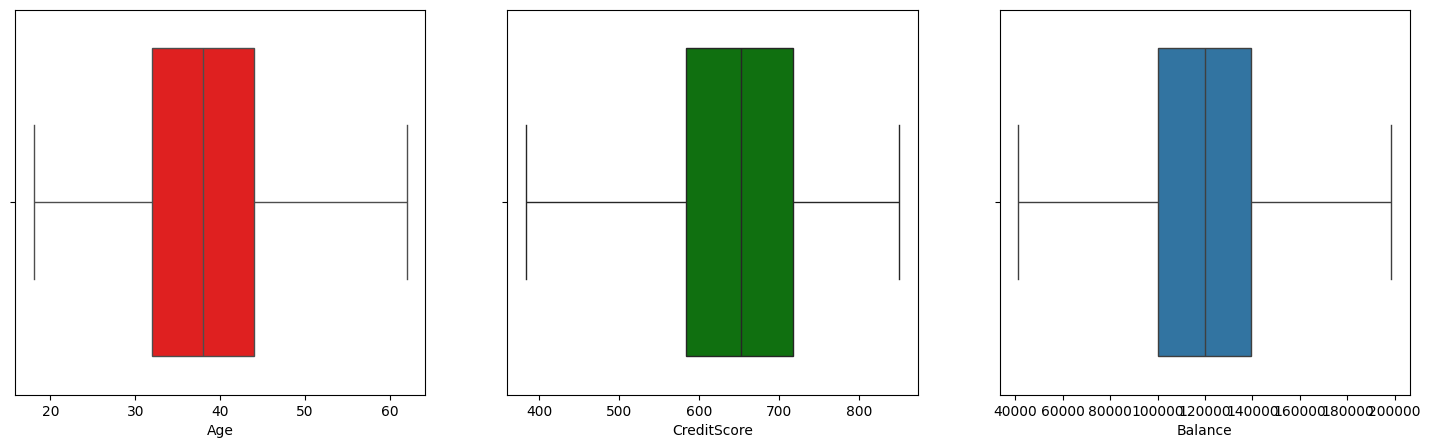

In [214]:
fi2,ax2=plt.subplots(1,3,figsize=(18,5))
sns.boxplot(x=new_df['Age'],data=new_df,ax=ax2[0],color='Red')
sns.boxplot(x=new_df['CreditScore'],data=new_df,ax=ax2[1],color='Green')
sns.boxplot(x=new_df['Balance'],data=new_df,ax=ax2[2])

In [215]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
5,645,2,0,44,8,113755.78,2,1,0,149756.71,1
7,383,1,1,29,4,115046.74,4,1,0,119346.88,1


In [216]:
list_norm=['CreditScore','Balance','EstimatedSalary']

In [219]:
for s in list_norm:
    new_df[s]=scaler.fit_transform(new_df[[s]])

In [220]:
new_df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6020,0.483940,0,1,35,2,0.678319,1,1,0,0.700087,0
3978,0.972163,1,0,37,6,0.335715,2,1,0,0.703701,0
2602,0.451820,1,0,28,0,0.644466,2,1,0,0.645498,0
1991,0.520343,1,0,36,2,0.892979,2,1,1,0.287657,0
5255,0.890792,0,1,62,1,0.439405,2,1,0,0.187300,1
5285,0.006424,2,1,53,1,0.576963,1,1,1,0.312579,1
4062,0.376874,0,0,45,8,0.000000,1,0,1,0.849023,1
7871,0.627409,0,1,36,3,0.321159,1,1,1,0.477007,0
7729,1.000000,0,1,35,2,0.555309,4,1,0,0.377414,1
9927,0.922912,0,1,31,6,0.296120,1,1,0,0.942717,0


In [221]:
x_final=new_df.drop('Exited',axis=1)
y_final=new_df['Exited']

In [222]:
x_train_f,x_test_f,y_train_f,y_test_f=train_test_split(x_final,y_final,test_size=0.2,random_state=5)

In [223]:
LR.fit(x_train_f,y_train)

LogisticRegression()

In [224]:
LR.score(x_train_f,y_train)

0.7530356443399921

In [225]:
y_predict_f1=LR.predict(x_test)

In [226]:
print(accuracy_score(y_test_f,y_predict_f1) )

0.7564604541895067


In [240]:
model=keras.Sequential([keras.layers.Dense(150,input_shape=(10,),activation='relu'),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train_f,y_train_f,epochs=50)


Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 0.6352 - accuracy: 0.7317
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7658
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7711
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7699
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7797
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7771
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7795
Epoch 8/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7816
Epoch 9/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7832
Epoch 10/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7771

In [241]:
y_predict_f2=model.predict(x_test)

40/40 [==============================] - 0s 1ms/step


In [242]:
model.evaluate(x_test_f,y_test_f)

40/40 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7987


[0.4430573582649231, 0.7987470626831055]